<a href="https://colab.research.google.com/github/Charlesrichie/Codespace-/blob/main/IoT_ML_with_Ton_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Downloading ToN_IoT Datasets

In [ ]:
# Download Dataset
import requests

def download_dataset(url, file_name):
  '''function to download dataset from url
  args
  url: str, download link
  file_name: str, name of the file
  '''
  r = requests.get(url, allow_redirects=True)
  open(file_name, 'wb').write(r.content)


download_dataset('https://cloudstor.aarnet.edu.au/plus/s/ds5zW91vdgjEj9i/download?path=%2FTrain_Test_datasets%2FTrain_Test_Network_dataset&files=Train_Test_Network.csv&downloadStartSecret=ohroysxk3vq', 'Train_Test_Network.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount("/content/drive")
# Load dataset

dataset = pd.read_csv("/content/drive/MyDrive/cicids2017_cleaned.csv")  # Use a manageable subset


print(dataset.columns)
print(dataset.head())

Mounted at /content/drive
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'Average Packet Size', 'Subflow Fwd Bytes',
       'Init_Win_bytes_forward', 'Init_Win_by

### Load Datasets

In [2]:
dataset.tail(30)

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
2520721,80,23749,1,0,0,0,0.000,0.000000,0,0,...,32,0,32,0.0,0,0,0.0,0,0,Normal Traffic
2520722,53,25726,2,104,52,52,52.000,0.000000,157,157,...,-1,1,20,0.0,0,0,0.0,0,0,Normal Traffic
2520723,52113,54,1,6,6,6,6.000,0.000000,6,6,...,256,0,20,0.0,0,0,0.0,0,0,Normal Traffic
2520724,53,61685,2,62,31,31,31.000,0.000000,127,127,...,-1,1,32,0.0,0,0,0.0,0,0,Normal Traffic
2520725,51621,88,1,0,0,0,0.000,0.000000,0,0,...,424,0,32,0.0,0,0,0.0,0,0,Normal Traffic
2520726,53,213,2,60,30,30,30.000,0.000000,132,132,...,-1,1,40,0.0,0,0,0.0,0,0,Normal Traffic
2520727,53,181,2,88,44,44,44.000,0.000000,172,172,...,-1,1,32,0.0,0,0,0.0,0,0,Normal Traffic
2520728,54714,3,1,6,6,6,6.000,0.000000,6,6,...,255,0,20,0.0,0,0,0.0,0,0,Normal Traffic
2520729,53,534,2,58,29,29,29.000,0.000000,89,89,...,-1,1,32,0.0,0,0,0.0,0,0,Normal Traffic
2520730,37907,67,1,6,6,6,6.000,0.000000,6,6,...,229,0,20,0.0,0,0,0.0,0,0,Normal Traffic


In [3]:
dataset.shape

(2520751, 53)

In [5]:
# list all dataset columns
print("Full Dataset Columns", dataset.columns, sep='\n',
      end='\n\n')
print("Unique values in the 'category' column",
      dataset['Attack Type'].unique(), sep='\n')

Full Dataset Columns
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'Average Packet Size', 'Subflow Fwd Bytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_b

### Feature Extraction

In [7]:
# the features I want to use for prototyping
trial_features = ['Flow Duration', 'Total Fwd Packets',
                  'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
        'Flow Bytes/s', 'Flow Packets/s','Flow IAT Mean', 'Fwd IAT Total', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Fwd Packets/s', 'Bwd Packets/s', 'Attack Type']

subset_dataset =  dataset[trial_features]
print(subset_dataset)

         Flow Duration  Total Fwd Packets  Fwd Packet Length Mean  \
0              1266342                 41               64.975610   
1              1319353                 41               64.975610   
2                  160                  1                0.000000   
3              1303488                 41               66.536585   
4                   77                  1                0.000000   
...                ...                ...                     ...   
2520746          32215                  4               28.000000   
2520747            324                  2               42.000000   
2520748             82                  2               15.500000   
2520749        1048635                  6               32.000000   
2520750          94939                  4               47.000000   

         Bwd Packet Length Mean  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  \
0                    158.045455  7.595105e+03       67.122468    15075.50000   
1          

Attack Type
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64


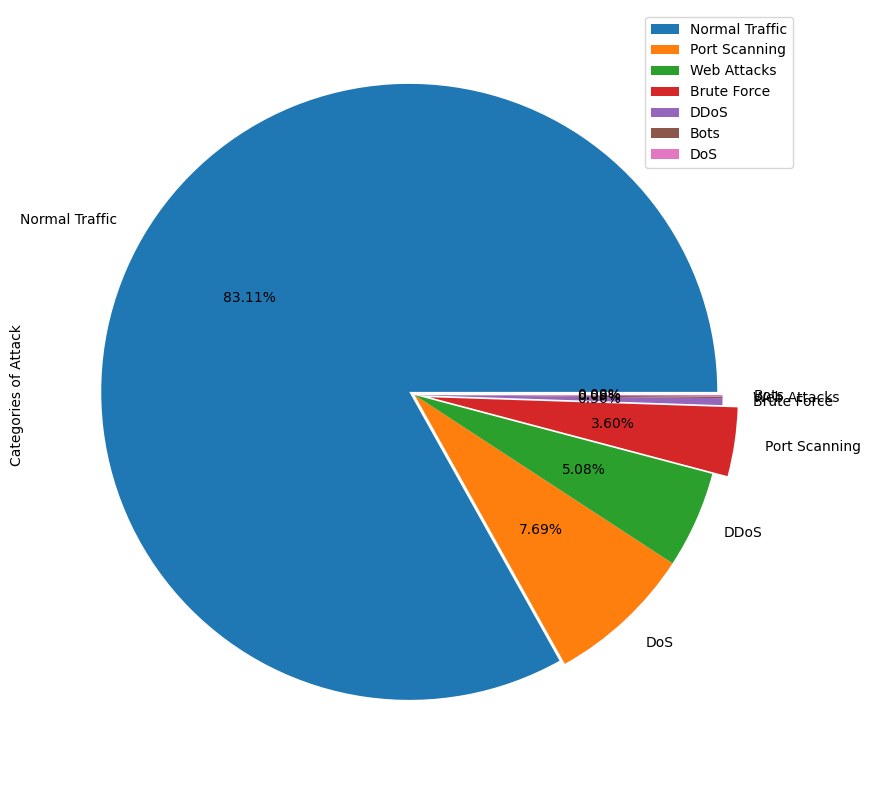

In [11]:
# check the number of unique values in the target variable
print(subset_dataset['Attack Type'].value_counts())
subset_dataset['Attack Type'].value_counts().plot(kind = 'pie',
                                           explode = [0.02, 0, 0, 0.05, 0, 0,
                                                      0], # Corrected explode list length
                                           figsize = (10, 10),
                                           autopct = '%1.2f%%',
                                           shadow = False)
plt.ylabel("Categories of Attack")
plt.legend(['Normal Traffic', 'Port Scanning', 'Web Attacks', 'Brute Force', 'DDoS',
            'Bots', 'DoS']) # Corrected legend labels
plt.show()

In [ ]:
# check the data type of dataframe columns
subset_dataset.dtypes

proto            object
duration        float64
src_bytes         int64
dst_bytes         int64
conn_state       object
missed_bytes      int64
src_pkts          int64
src_ip_bytes      int64
dst_pkts          int64
dst_ip_bytes      int64
dns_qclass        int64
dns_qtype         int64
dns_rcode         int64
type             object
dtype: object

In [12]:
# check for missing values
# subset_dataset[subset_dataset.isnull().any(axis=1)]
subset_dataset.isnull().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
2520746,False
2520747,False
2520748,False
2520749,False


In [16]:
# Split Data into Features and Target variables
X = subset_dataset.iloc[:, :-1].values
y = subset_dataset['Attack Type']
print(X)
print(y)
print(X.shape)

[[1.26634200e+06 4.10000000e+01 6.49756098e+01 ... 7.38769767e+03
  3.23767197e+01 3.47457480e+01]
 [1.31935300e+06 4.10000000e+01 6.49756098e+01 ... 8.45183721e+03
  3.10758379e+01 3.33496797e+01]
 [1.60000000e+02 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.25000000e+03 6.25000000e+03]
 ...
 [8.20000000e+01 2.00000000e+00 1.55000000e+01 ... 0.00000000e+00
  2.43902439e+04 1.21951220e+04]
 [1.04863500e+06 6.00000000e+00 3.20000000e+01 ... 3.00000000e+00
  5.72172395e+00 1.90724132e+00]
 [9.49390000e+04 4.00000000e+00 4.70000000e+01 ... 4.80000000e+01
  4.21323165e+01 2.10661583e+01]]
0          Normal Traffic
1          Normal Traffic
2          Normal Traffic
3          Normal Traffic
4          Normal Traffic
                ...      
2520746    Normal Traffic
2520747    Normal Traffic
2520748    Normal Traffic
2520749    Normal Traffic
2520750    Normal Traffic
Name: Attack Type, Length: 2520751, dtype: object
(2520751, 12)


# One-Hot Encode Categorical Variables

In [18]:
# Handling Categorical Data
# Since there are no categorical features in the selected subset,
# one-hot encoding is not needed.
# X is already a numpy array from the previous step and can be used directly.
encoded_X = X
print(encoded_X.shape)

(2520751, 12)


In [19]:
# np.set_printoptions(threshold=np.inf)

# print(encoded_X)

In [20]:
print(encoded_X.shape)

(2520751, 12)


### Label Encode the target variable

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

Mapping of Label Encoded Classes
{'Bots': np.int64(0), 'Brute Force': np.int64(1), 'DDoS': np.int64(2), 'DoS': np.int64(3), 'Normal Traffic': np.int64(4), 'Port Scanning': np.int64(5), 'Web Attacks': np.int64(6)}


In [22]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(encoded_X, encoded_y, test_size=0.3,
                                                  random_state=0,
                                                  stratify=encoded_y)

print('X Training set', X_train, sep='\n')
print('X Validation set', X_val, sep='\n')
print('y Training set', y_val, sep='\n')
print('y Validation set', y_val, sep='\n')

X Training set
[[4.81980000e+04 4.00000000e+00 2.90000000e+01 ... 3.00000000e+00
  8.29909955e+01 4.14954977e+01]
 [2.33370000e+04 1.00000000e+00 4.70000000e+01 ... 0.00000000e+00
  4.28504092e+01 4.28504092e+01]
 [6.00000000e+01 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.66666667e+04 1.66666667e+04]
 ...
 [1.58000000e+02 2.00000000e+00 4.00000000e+01 ... 3.00000000e+00
  1.26582278e+04 1.26582278e+04]
 [2.80880000e+04 3.00000000e+00 8.66666667e+00 ... 9.34733333e+03
  1.06807177e+02 1.42409570e+02]
 [9.70000000e+01 2.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.06185567e+04 0.00000000e+00]]
X Validation set
[[5.43588700e+06 3.00000000e+00 4.00000000e+00 ... 0.00000000e+00
  5.51887852e-01 1.83962617e-01]
 [1.38644520e+07 2.10000000e+01 9.56190476e+01 ... 4.62143267e+05
  1.51466499e+00 2.23593403e+00]
 [9.80789720e+07 5.00000000e+00 7.70000000e+01 ... 1.96000000e+07
  5.09793270e-02 6.11751930e-02]
 ...
 [2.42088000e+05 2.00000000e+00 3.50000000e+01 ... 4.80000000e+01


### Feature Scaling

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
print(scaled_X_train)
print(scaled_X_val)
print(len(scaled_X_train))
print(len(scaled_X_val))

[[-0.46956914 -0.00775623 -0.1766143  ... -0.21588989 -0.21117715
  -0.17011236]
 [-0.47027478 -0.01158371 -0.08489441 ... -0.21589021 -0.21138512
  -0.1700768 ]
 [-0.47093546 -0.01158371 -0.32438523 ... -0.21589021 -0.12525679
   0.26617348]
 ...
 [-0.47093268 -0.01030788 -0.12056326 ... -0.21588989 -0.1460246
   0.16098208]
 [-0.47013993 -0.00903206 -0.2802238  ... -0.21489456 -0.21105376
  -0.16746412]
 [-0.47093441 -0.01030788 -0.32438523 ... -0.21589021 -0.10478197
  -0.1712013 ]]
[[-3.16648610e-01 -9.03205556e-03 -3.04003031e-01 ... -2.15890206e-01
  -2.11604273e-01 -1.71196475e-01]
 [-7.74179018e-02  1.39328086e-02  1.62846336e-01 ... -1.66664190e-01
  -2.11599285e-01 -1.71142627e-01]
 [ 2.31287028e+00 -6.48040399e-03  6.79720626e-02 ...  1.87183882e+00
  -2.11606868e-01 -1.71199698e-01]
 ...
 [-4.64065901e-01 -1.03078813e-02 -1.46041005e-01 ... -2.15885093e-01
  -2.11564330e-01 -1.70984502e-01]
 [-4.70934495e-01 -1.03078813e-02 -2.93811932e-01 ... -2.15890206e-01
  -1.01372655e

### Train Model

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model

  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')

# class labels
label = ['Bots', 'Brute Force', 'DDoS', 'DoS', 'Normal Traffic', 'Port Scanning', 'Web Attacks']

### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy_score': 0.7674495275938956, 'precision_score': 0.5773948430495188, 'recall_score': 0.4399613333333333, 'f1_score': 0.3936017166366333}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      0.99      0.61      5000
           1       0.69      0.92      0.79      5000
           2       0.73      0.07      0.13      5000
           3       0.73      0.02      0.05      5000
           4       0.00      0.00      0.00       261
           5       0.84      0.95      0.89     75000
           6       0.19      0.02      0.03      5000
           7       0.89      0.07      0.13      5000
           8       0.67      0.77      0.71      5000
           9       0.60      0.59      0.60      5000

    accuracy                           0.77    115261
   macro avg       0.58      0.44      0.39    115261
weighted avg       0.76      0.77      0.71    115261



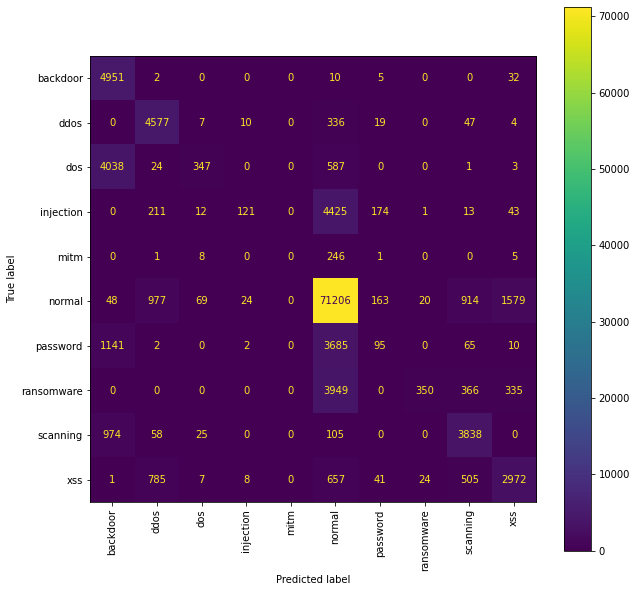

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=3000)
logistic_regression_model.fit(scaled_X_train, y_train)
logistic_regression_y_pred = logistic_regression_model.predict(scaled_X_val)
print(evaluate_model(y_val, logistic_regression_y_pred))
plot_confusion_matrix(y_val, logistic_regression_y_pred, label)
print(classification_report(y_val, logistic_regression_y_pred))

### KNN Algorithm

{'accuracy_score': 0.9763146250683232, 'precision_score': 0.9139897610275718, 'recall_score': 0.9233031724137932, 'f1_score': 0.9181335854627442}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.97      0.97      0.97      5000
           2       0.98      0.98      0.98      5000
           3       0.97      0.96      0.97      5000
           4       0.59      0.56      0.57       261
           5       1.00      0.99      0.99     75000
           6       0.86      0.99      0.92      5000
           7       0.86      0.90      0.88      5000
           8       0.99      0.99      0.99      5000
           9       0.93      0.91      0.92      5000

    accuracy                           0.98    115261
   macro avg       0.91      0.92      0.92    115261
weighted avg       0.98      0.98      0.98    115261



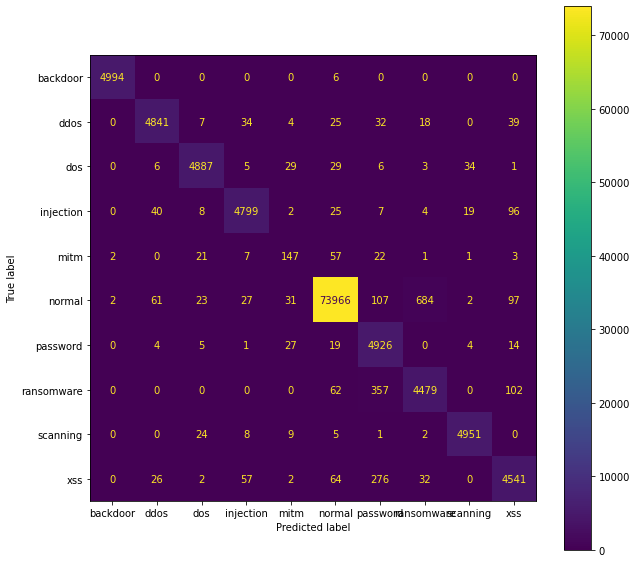

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(scaled_X_train, y_train)
knn_y_pred = knn_model.predict(scaled_X_val)

print(evaluate_model(y_val, knn_y_pred))
plot_confusion_matrix(y_val, knn_y_pred, label)
print(classification_report(y_val, knn_y_pred))

### Support Vector Machine

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_svm))
print(classification_report(y_val, y_pred_svm))
plot_confusion_matrix(y_val, y_pred_svm, label)

### Decision Tree Classifier

{'accuracy_score': 0.9805745221714196, 'precision_score': 0.9292675324839212, 'recall_score': 0.9319894406130269, 'f1_score': 0.930457464873143}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.97      0.96      0.97      5000
           2       0.99      0.98      0.98      5000
           3       0.97      0.96      0.97      5000
           4       0.62      0.62      0.62       261
           5       0.99      0.99      0.99     75000
           6       0.99      0.97      0.98      5000
           7       0.85      0.93      0.89      5000
           8       0.99      0.99      0.99      5000
           9       0.93      0.92      0.92      5000

    accuracy                           0.98    115261
   macro avg       0.93      0.93      0.93    115261
weighted avg       0.98      0.98      0.98    115261



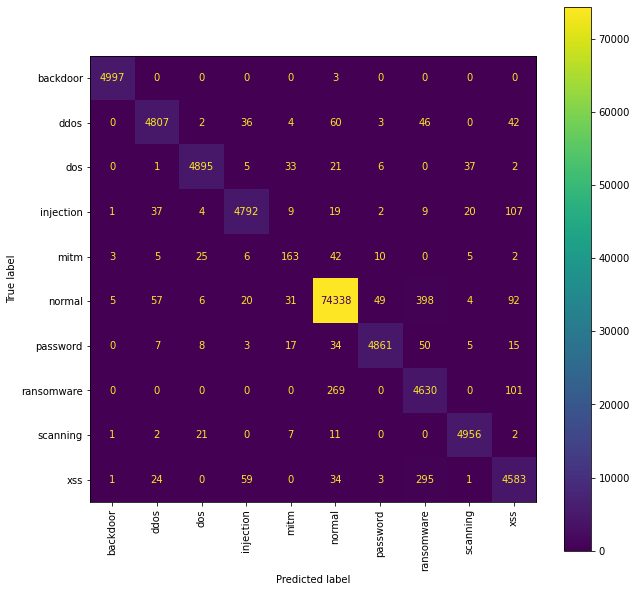

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                             min_samples_split=40,
                                             random_state=0)
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(scaled_X_val)

print(evaluate_model(y_val, decision_tree_y_pred))
print(classification_report(y_val, decision_tree_y_pred))
plot_confusion_matrix(y_val, decision_tree_y_pred, label)

### Random Forest Classifier

{'accuracy_score': 0.982118843320811, 'precision_score': 0.9423070453315662, 'recall_score': 0.943321318007663, 'f1_score': 0.9426273967382505}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.98      0.96      0.97      5000
           2       0.99      0.98      0.99      5000
           3       0.98      0.96      0.97      5000
           4       0.72      0.72      0.72       261
           5       0.99      0.99      0.99     75000
           6       0.99      0.97      0.98      5000
           7       0.85      0.93      0.89      5000
           8       0.99      0.99      0.99      5000
           9       0.93      0.93      0.93      5000

    accuracy                           0.98    115261
   macro avg       0.94      0.94      0.94    115261
weighted avg       0.98      0.98      0.98    115261



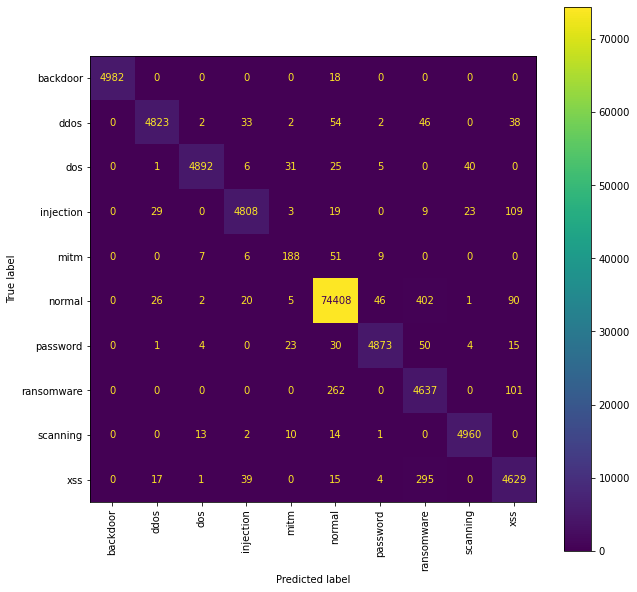

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100,
                                             criterion="entropy",
                                             min_samples_split=30,
                                             random_state=0)
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(scaled_X_val)

print(evaluate_model(y_val, random_forest_y_pred))
print(classification_report(y_val, random_forest_y_pred))
plot_confusion_matrix(y_val, random_forest_y_pred, label)

### Naive Bayes

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy_score': 0.06437563442968566, 'precision_score': 0.24908204132329556, 'recall_score': 0.14147627586206896, 'f1_score': 0.05163697553970753}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.67      0.00      0.01      5000
           2       0.02      0.00      0.00      5000
           3       0.00      0.00      0.00      5000
           4       0.26      0.03      0.06       261
           5       0.96      0.01      0.01     75000
           6       0.16      0.30      0.21      5000
           7       0.05      1.00      0.10      5000
           8       0.00      0.00      0.00      5000
           9       0.38      0.07      0.12      5000

    accuracy                           0.06    115261
   macro avg       0.25      0.14      0.05    115261
weighted avg       0.68      0.06      0.03    115261



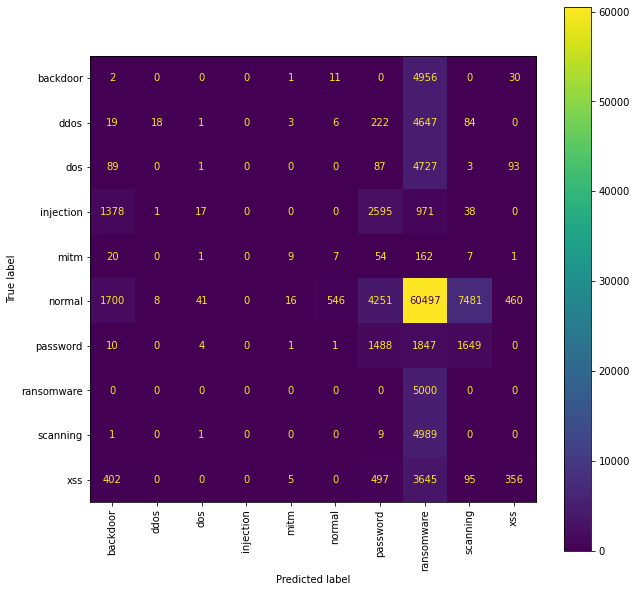

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(scaled_X_train, y_train)
y_pred_nb = naive_bayes_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_nb))
print(classification_report(y_val, y_pred_nb))
plot_confusion_matrix(y_val, y_pred_nb, label)

### XGBOOST

{'accuracy_score': 0.9735296414225106, 'precision_score': 0.9174756459621378, 'recall_score': 0.9135283218390804, 'f1_score': 0.9149217531709837}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.98      0.93      0.96      5000
           2       0.99      0.97      0.98      5000
           3       0.96      0.93      0.95      5000
           4       0.58      0.54      0.56       261
           5       0.99      0.99      0.99     75000
           6       0.98      0.97      0.98      5000
           7       0.81      0.92      0.86      5000
           8       0.98      0.99      0.98      5000
           9       0.90      0.90      0.90      5000

    accuracy                           0.97    115261
   macro avg       0.92      0.91      0.91    115261
weighted avg       0.97      0.97      0.97    115261



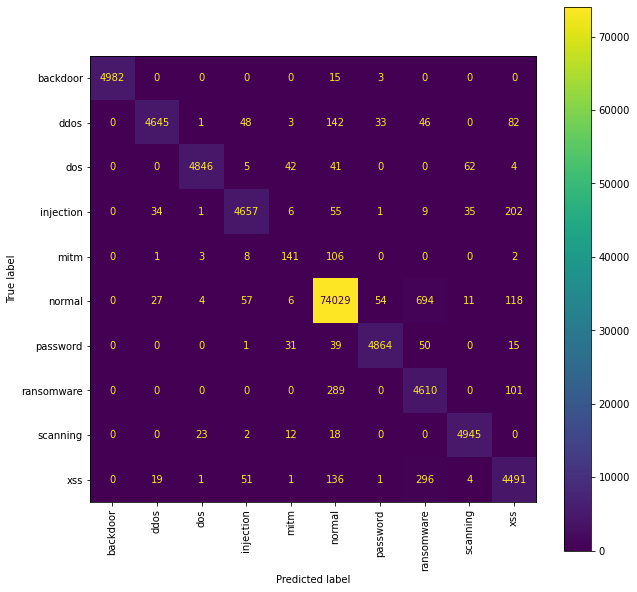

In [ ]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_model.fit(scaled_X_train, y_train)
y_pred_xgb = xgboost_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))
plot_confusion_matrix(y_val, y_pred_xgb, label)

### Artificial Neural Network

In [26]:
from tensorflow.keras.utils import to_categorical

encoded_y_train = to_categorical(y_train)
encoded_y_val = to_categorical(y_val)
encoded_y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [28]:
import tensorflow as tf
print(tf.__version__)

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=7, activation='softmax')) # Corrected units to 7

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = ann_model.fit(scaled_X_train, encoded_y_train, validation_split=0.25, batch_size=32, epochs=100)

2.19.0
Epoch 1/100
41357/41357 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - accuracy: 0.9235 - loss: 0.2558 - precision_1: 0.9288 - recall_1: 0.9050 - val_accuracy: 0.9435 - val_loss: 0.1528 - val_precision_1: 0.9441 - val_recall_1: 0.9429
Epoch 2/100
41357/41357 ━━━━━━━━━━━━━━━━━━━━ 147s 3ms/step - accuracy: 0.9459 - loss: 0.1464 - precision_1: 0.9463 - recall_1: 0.9454 - val_accuracy: 0.9491 - val_loss: 0.1211 - val_precision_1: 0.9494 - val_recall_1: 0.9488
Epoch 3/100
41357/41357 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - accuracy: 0.9606 - loss: 0.1174 - precision_1: 0.9614 - recall_1: 0.9598 - val_accuracy: 0.9724 - val_loss: 0.0953 - val_precision_1: 0.9729 - val_recall_1: 0.9716
Epoch 4/100
41357/41357 ━━━━━━━━━━━━━━━━━━━━ 104s 3ms/step - accuracy: 0.9703 - loss: 0.0954 - precision_1: 0.9708 - recall_1: 0.9698 - val_accuracy: 0.9688 - val_loss: 0.0927 - val_precision_1: 0.9695 - val_recall_1: 0.9685
Epoch 5/100
41357/41357 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - accuracy: 0.9733 - loss: 0.0866 

In [29]:
ann_y_pred = ann_model.predict(scaled_X_val)
ann_y_pred = (ann_y_pred > 0.5)
ann_y_pred

23633/23633 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step


array([[False, False, False, ...,  True, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False]])

In [30]:

# Check the validation accuracy
_, accuracy, precision, recall = ann_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

23633/23633 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9852 - loss: 0.0610 - precision_1: 0.9854 - recall_1: 0.9850
Accuracy: 98.56


Text(0.5, 0, 'epoch')

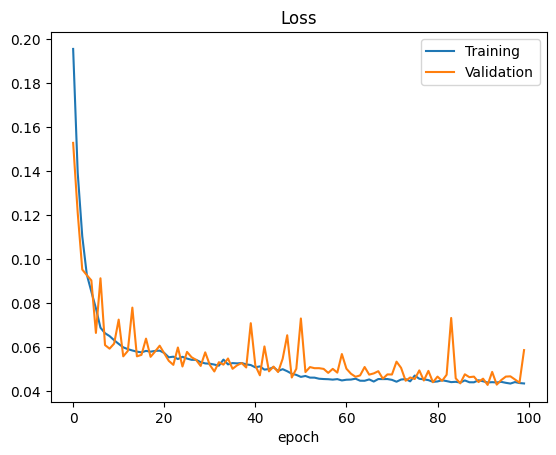

In [31]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

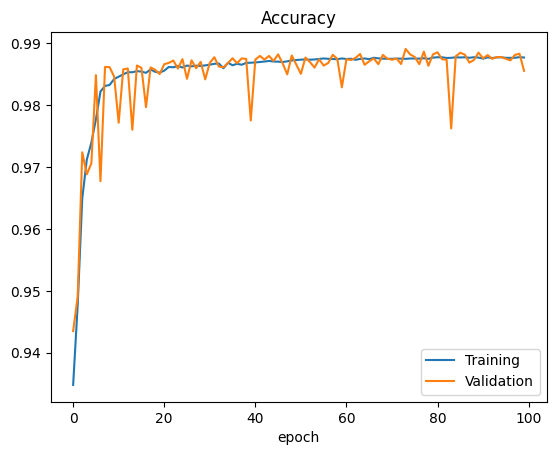

In [32]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

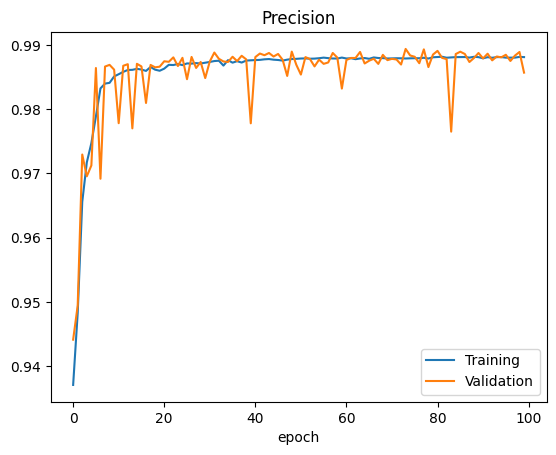

In [36]:
# Plot graph between training and validation precision
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.legend(['Training', 'Validation'])
plt.title('Precision')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

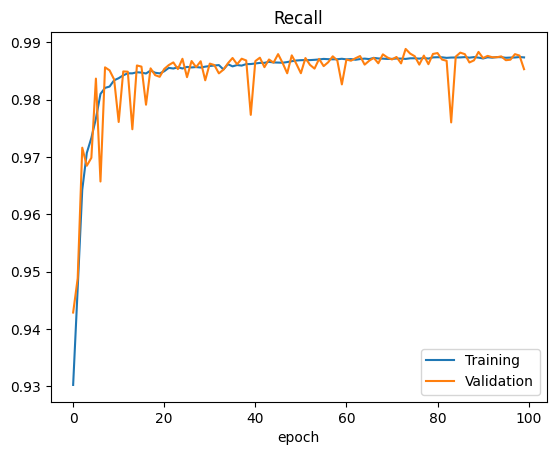

In [37]:
# Plot graph between training and validation recall
plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.legend(['Training', 'Validation'])
plt.title('Recall')
plt.xlabel('epoch')

{'accuracy_score': 0.9853839989632729, 'precision_score': 0.7019873306418204, 'recall_score': 0.6833876221775831, 'f1_score': 0.6921379597951176}
              precision    recall  f1-score   support

           0       0.03      0.02      0.02       584
           1       0.95      0.96      0.95      2745
           2       0.99      0.99      0.99     38404
           3       0.98      0.92      0.95     58124
           4       0.99      1.00      0.99    628518
           5       0.98      0.90      0.94     27208
           6       0.00      0.00      0.00       643

    accuracy                           0.99    756226
   macro avg       0.70      0.68      0.69    756226
weighted avg       0.98      0.99      0.98    756226



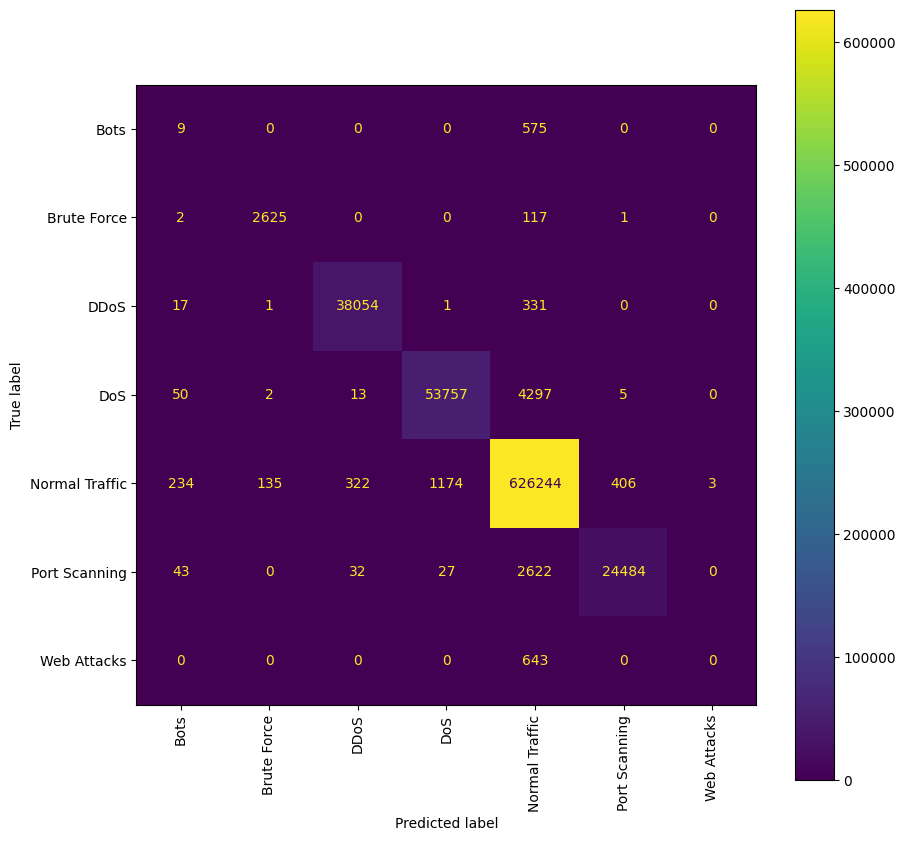

In [40]:
print(evaluate_model(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1)))
print(classification_report(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1)))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1), label)

In [42]:
ann_model.save('model.h5')

In [54]:
import tensorflow as tf

ann_model.save('my_model.keras')

## Hybrid Model

{'accuracy_score': 0.9817371010142198, 'precision_score': 0.9410593810316132, 'recall_score': 0.9432982681992337, 'f1_score': 0.941971513267484}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.99      0.96      0.98      5000
           2       1.00      0.98      0.99      5000
           3       0.97      0.96      0.96      5000
           4       0.71      0.73      0.72       261
           5       0.99      0.99      0.99     75000
           6       0.99      0.97      0.98      5000
           7       0.85      0.93      0.89      5000
           8       0.99      0.99      0.99      5000
           9       0.92      0.93      0.92      5000

    accuracy                           0.98    115261
   macro avg       0.94      0.94      0.94    115261
weighted avg       0.98      0.98      0.98    115261



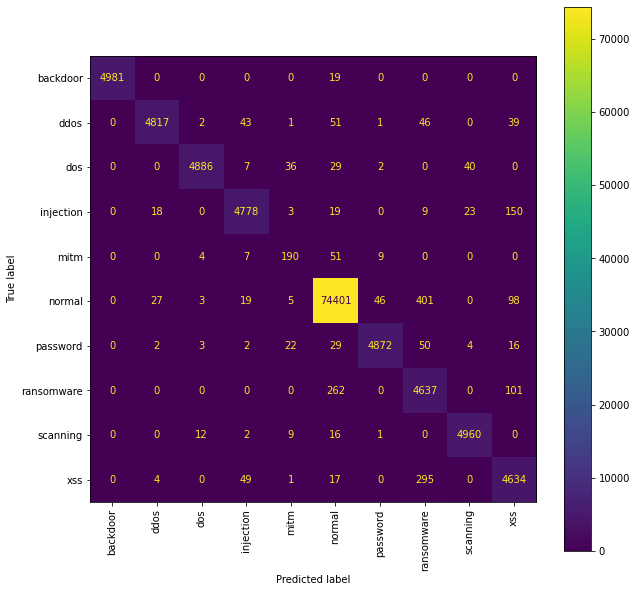

In [ ]:
# Defining Hybrid Ensemble Learning Model

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

estimators = []

#Defining Decision Tree Classifiers
model1 = DecisionTreeClassifier(criterion='gini',
                                min_samples_split=55,
                               random_state=0)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(criterion='entropy',
                                min_samples_split=50,
                                random_state=0)
estimators.append(('cart3', model2))


#Defining K-NN classifiers
model3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
estimators.append(('knn1', model3))

model4 = XGBClassifier()
estimators.append(('xgboost', model4))

model5 = RandomForestClassifier(n_estimators=100,
                                criterion="entropy",
                                min_samples_split=40,
                                random_state=0)
estimators.append(('rf1', model5))

model6 = RandomForestClassifier(n_estimators=200,
                                criterion="entropy",
                                min_samples_split=35,
                                random_state=0)
estimators.append(('rf2', model6))

# Defining the ensemble model
ensemble = VotingClassifier(estimators,
                            voting='hard',
                            weights=[1, 1, 1, 1, 1.1, 1.1])

ensemble.fit(scaled_X_train, y_train)
y_pred_hybrid = ensemble.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_hybrid))
print(classification_report(y_val, y_pred_hybrid))
plot_confusion_matrix(y_val, y_pred_hybrid, label)

# Visualize the Results

In [ ]:
# Create empty list for accuracy, precision, recall and f1-score of each ml algorithm
accuracy_score_tf = [0.767450, 0.976315, 0.64376, 0.980575, 0.982119, 0.973530, 0.795343, 0.981737]
precision_score_tf = [0.57739, 0.91399, 0.24908, 0.92927, 0.94231, 0.91748, 0.595091, 0.94106]
recall_score_tf = [0.43996, 0.92330, 0.14148, 0.93199, 0.94332, 0.91353, 0.56224, 0.94330]
f1_score_tf = [0.39360, 0.91813, 0.05164, 0.93046, 0.94263, 0.91492, 0.524571, 0.94197]

models = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree",
          "Random Forest", "XGBoost", "ANN", "Hybrid Model"]

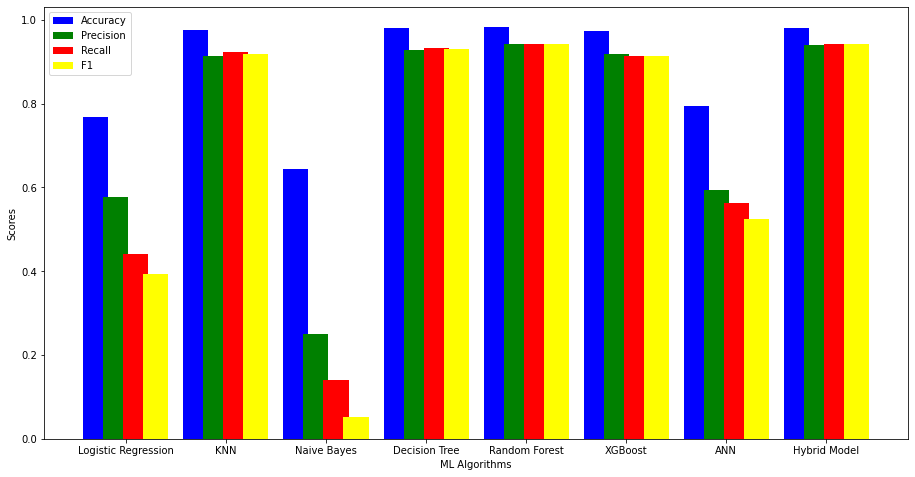

In [ ]:
X = np.arange(8)
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, accuracy_score_tf, color = 'b', width = 0.25)
ax.bar(X + 0.20, precision_score_tf, color = 'g', width = 0.25)
ax.bar(X + 0.40, recall_score_tf, color = 'r', width = 0.25)
ax.bar(X + 0.60, f1_score_tf, color = 'yellow', width = 0.25)
plt.xticks(X+0.30, models)
plt.xlabel("ML Algorithms")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall", "F1"])

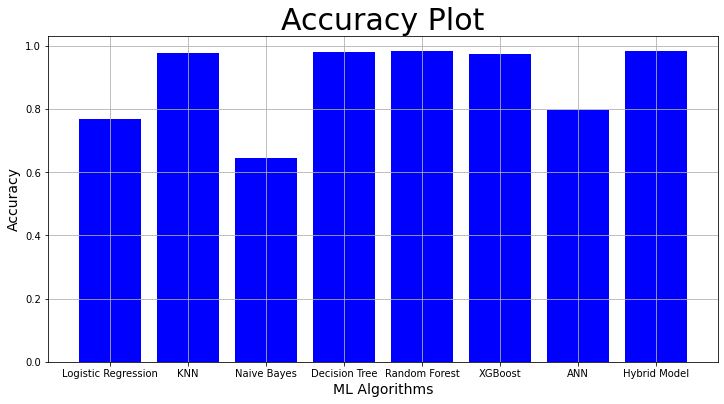

In [ ]:
# Accuracy Plot
plt.figure(figsize=(12,6))
colour = ['green', 'blue', 'orange', 'violet', 'brown', 'red', 'magenta', 'yellow']

models = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree",
          "Random Forest", "XGBoost", "ANN", "Hybrid Model"]
ax = plt.gca()

plt.bar(models, accuracy_score_tf, color='b')
plt.title('Accuracy Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

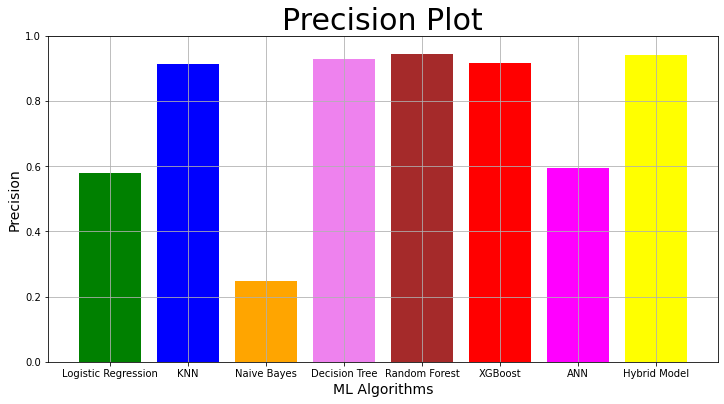

In [ ]:
# Precision Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 1)
plt.bar(models, precision_score_tf, color=colour)
plt.title('Precision Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

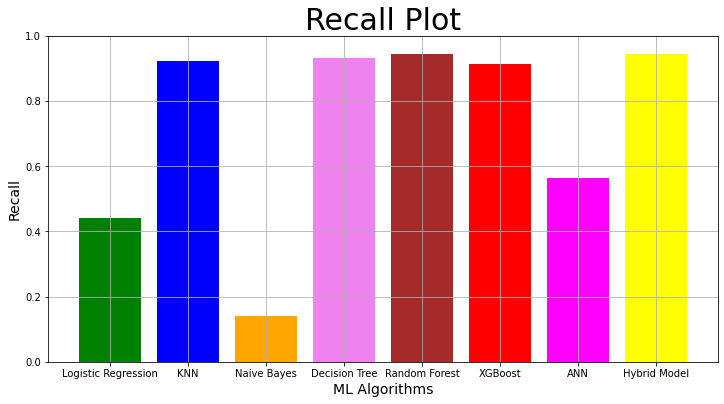

In [ ]:
# Recall Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 1)
plt.bar(models, recall_score_tf, color=colour)
plt.title('Recall Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.grid(True)
plt.show()

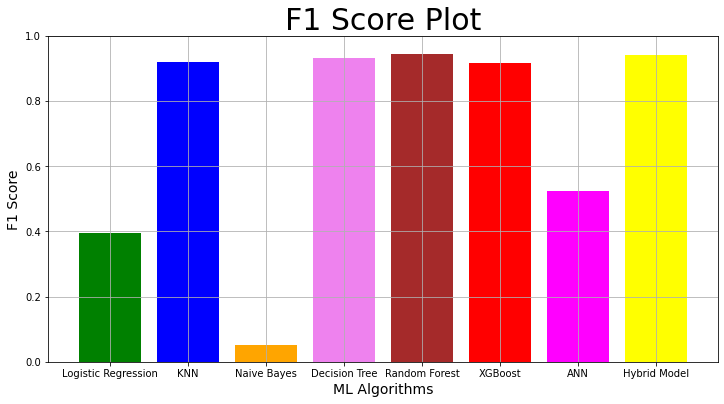

In [ ]:
# F1-Score Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 1)
plt.bar(models, f1_score_tf, color=colour)
plt.title('F1 Score Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.grid(True)
plt.show()